## HDAT 9910 Capstone


Research Question 1: Mortality Prediction in ICU 

Task: The task is to build a predictive algorithm using the techniques we learned in this course. 

Objective: To assess the role of machine learning algorithms for predicting mortality by using the MIMIC-III dataset. 

Question: Is it possible to accurately predict mortality based on data from the first 24 hours in ICU?   

Study Population: MIMIC-III dataset 

#### Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


#### Load in the MIMIC-III Dataset

In [10]:
# Create a function to loads through all CSV files
def read_all_datasets(data_folder):
    
    datasets = {}

    csv_files = [
        'vitals_hourly.csv', 'admissions.csv', 'antibiotics.csv', 'bloodculture.csv',
        'gcs_hourly.csv', 'icd9_diag.csv', 'icustays.csv', 'labs_hourly.csv',
        'output_hourly.csv', 'patients.csv', 'pt_icu_outcome.csv', 'pt_stay_hr.csv',
        'pt_weight.csv', 'pv_mechvent.csv', 'transfers.csv', 'vasopressors.csv'
    ]

    for file in csv_files:
        file_path = os.path.join(data_folder, file)

        if os.path.exists(file_path):
            datasets[file.replace('.csv', '')] = pd.read_csv(file_path)
        else:
            print(f"File not found: {file}")

    return datasets

data_folder = '/Users/zacharylukac/Desktop/HDAT-9910-Capstone/mimic_data/'
all_datasets = read_all_datasets(data_folder)

# Assign all files to a dataframe for exploration
admissions_df = all_datasets['admissions']
vitals_hourly_df = all_datasets['vitals_hourly']
antibiotics_df = all_datasets['antibiotics']
bloodculture_df = all_datasets['bloodculture']
gcs_hourly_df = all_datasets['gcs_hourly']
icd9_diag_df = all_datasets['icd9_diag']
icustays_df = all_datasets['icustays']
labs_hourly_df = all_datasets['labs_hourly']
pt_stay_hr_df = all_datasets['pt_stay_hr']
pt_icu_outcome_df = all_datasets['pt_icu_outcome']
patients_df = all_datasets['patients']
output_hourly_df = all_datasets['output_hourly']
pt_weight_df = all_datasets['pt_weight']
pv_mechvent_df = all_datasets['pv_mechvent']
transfers_df = all_datasets['transfers']
vasopressors_df = all_datasets['vasopressors']

## Explore variables relating to the research question

In [14]:
admissions_df = admissions_df.drop(['language', 'insurance', 'ethnicity', 'religion', 'marital_status'], axis=1)


In [34]:
df = df[df['icu_expire_flag'] == 1]

In [35]:
df2 = df2[df2['icu_expire_flag'] == 1]

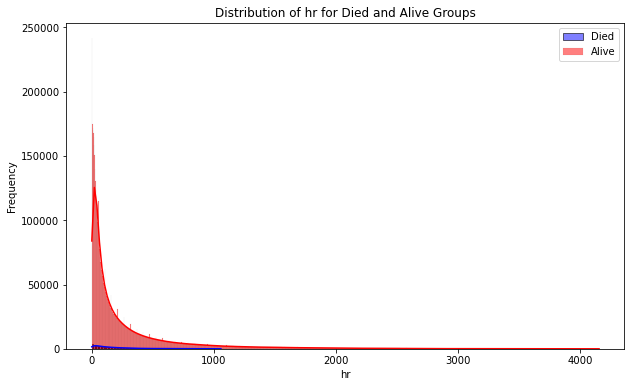

In [ ]:
died_data = df[df['icu_expire_flag'] == 1]
alive_data = df[df['icu_expire_flag'] == 0]
column_names = ['hr', 'spo2', 'fio2', 'temperature', 'resprate', 'heartrate', 'sysbp', 
                'diasbp', 'glucose', 'meanarterialpressure']
# EDA for the features
for column in column_names:
    plt.figure(figsize=(10, 6))
    
    # Plot the distribution for each group
    sns.histplot(died_data[column].dropna(), kde=True, label='Died', color='blue')
    sns.histplot(alive_data[column].dropna(), kde=True, label='Alive', color='red')
    
    plt.title(f'Distribution of {column} for Died and Alive Groups')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

             row_id    subject_id        hadm_id     icustay_id           los  \
count  45394.000000  45394.000000   45394.000000   45394.000000  45394.000000   
mean   17583.145790  13877.755496  147446.790104  250204.545116     15.339721   
std     9885.586189   7905.602104   28558.746324   28603.032340     10.951828   
min       88.000000     84.000000  100109.000000  200119.000000      0.128500   
25%     9686.000000   7605.000000  122742.000000  223584.000000      6.722200   
50%    19107.000000  15055.000000  148420.000000  250946.000000     13.609000   
75%    26685.000000  21046.000000  170350.000000  276732.000000     21.829200   
max    53716.000000  76527.000000  199845.000000  299463.000000     44.058300   

       icu_expire_flag  hospital_expire_flag  expire_flag      ttd_days  \
count          45394.0               45394.0      45394.0  45394.000000   
mean               1.0                   1.0          1.0     14.303917   
std                0.0                   0.0 

<Figure size 864x576 with 0 Axes>

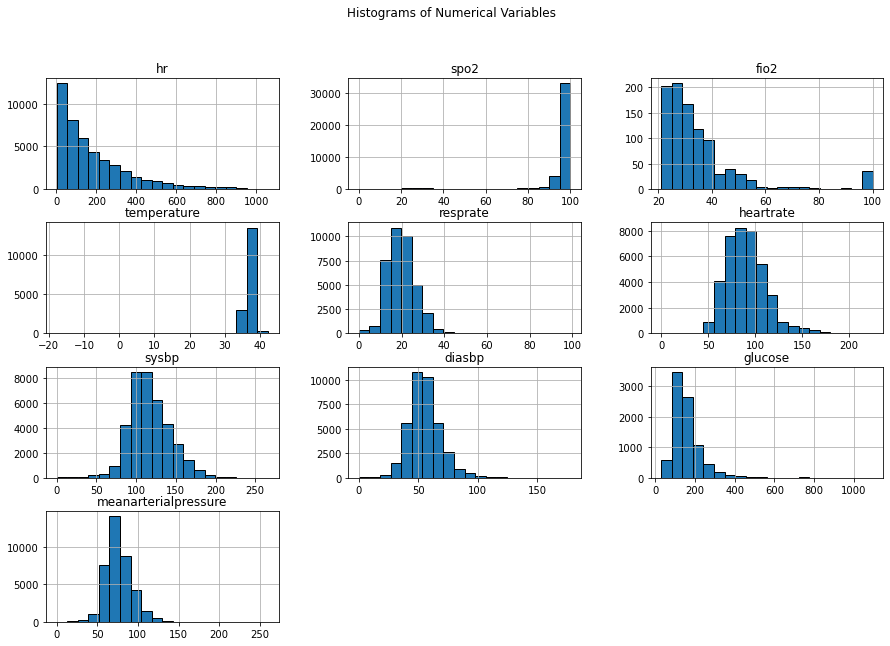

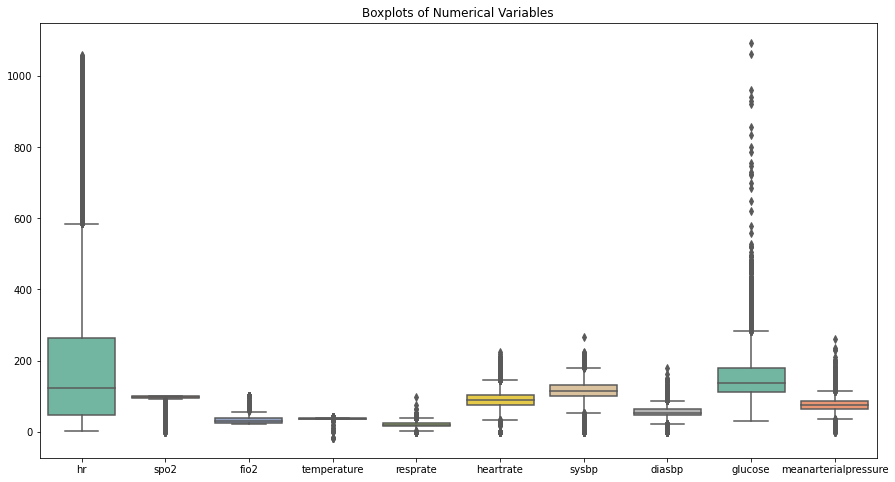

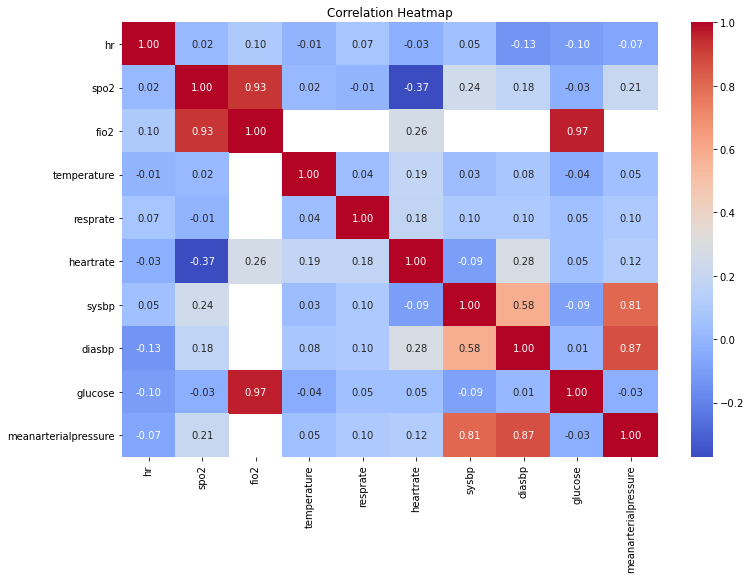

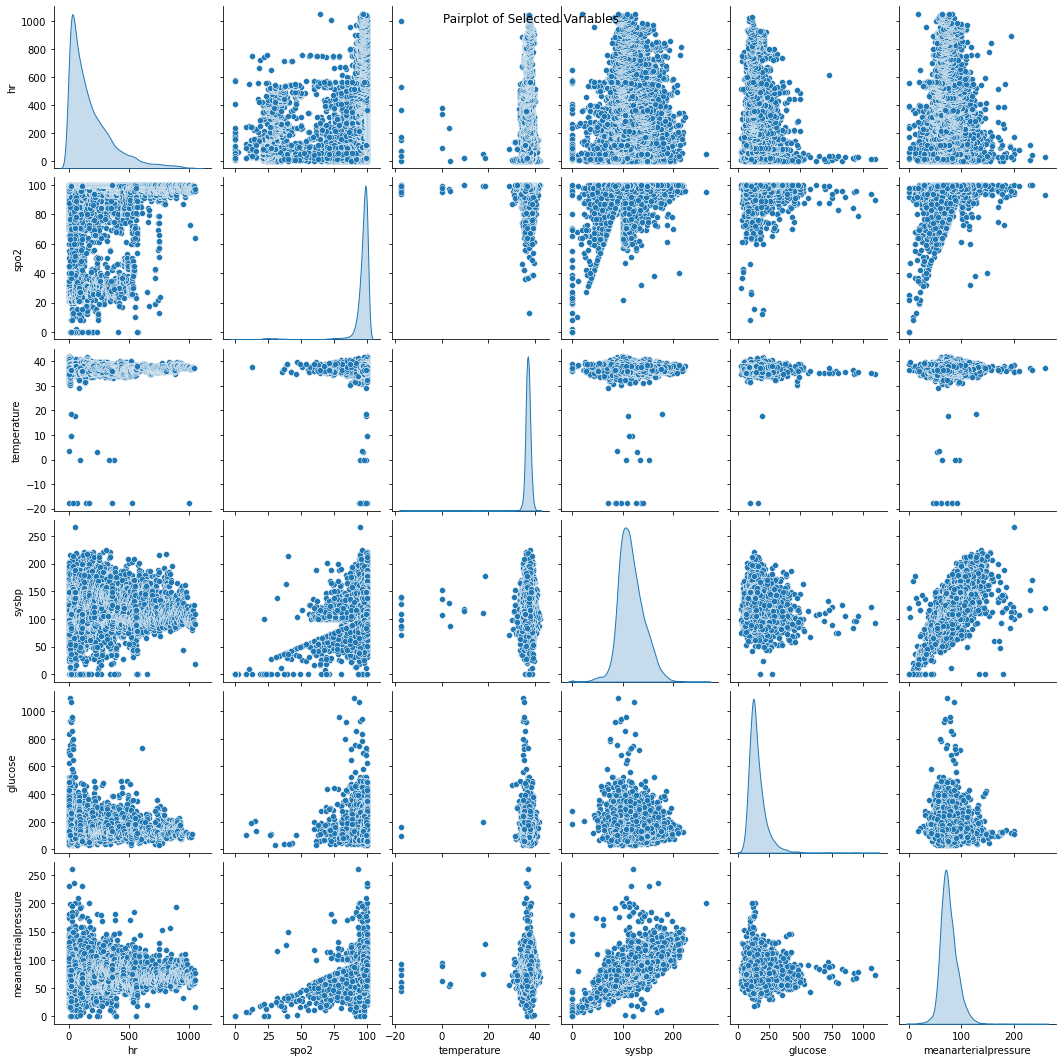

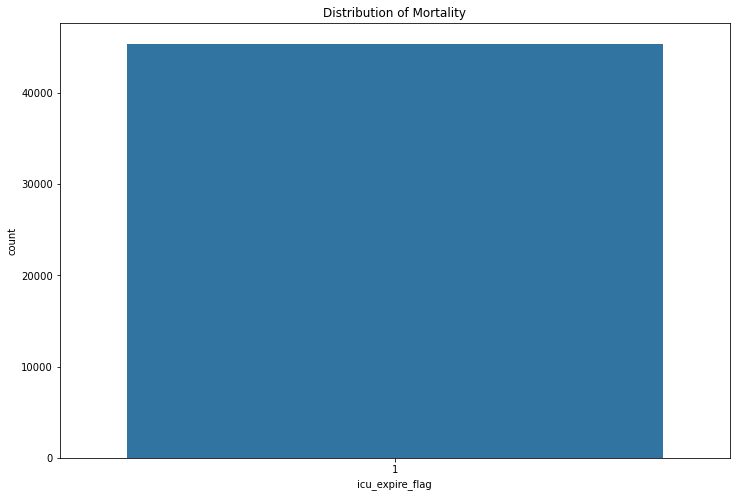

In [30]:
# Display basic statistics of numerical columns
print(df.describe())

# Visualize distribution of numerical variables
numerical_columns = ['hr', 'spo2', 'fio2', 'temperature', 'resprate', 'heartrate', 'sysbp', 'diasbp', 'glucose', 'meanarterialpressure']

plt.figure(figsize=(12, 8))
df[numerical_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Boxplot for each numerical variable
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns], palette='Set2')
plt.title('Boxplots of Numerical Variables')
plt.show()

# Correlation heatmap
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected variables
selected_variables = ['hr', 'spo2', 'temperature', 'sysbp', 'glucose', 'meanarterialpressure']
sns.pairplot(df[selected_variables], diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables')
plt.show()



             row_id    subject_id        hadm_id     icustay_id          los  \
count   8911.000000   8911.000000    8911.000000    8911.000000  8911.000000   
mean   17931.310627  14158.414432  146762.206374  249205.938727    14.044025   
std     9916.950638   7961.564140   29052.416993   28463.639968    11.292746   
min       88.000000     84.000000  100109.000000  200119.000000     0.128500   
25%     9924.000000   7785.000000  122327.000000  222834.000000     5.105600   
50%    19233.000000  15170.000000  147409.000000  250387.000000    11.493100   
75%    26774.000000  21122.000000  169873.000000  274605.000000    20.000700   
max    53716.000000  76527.000000  199845.000000  299463.000000    44.058300   

       icu_expire_flag  hospital_expire_flag  expire_flag     ttd_days  \
count           8911.0                8911.0       8911.0  8911.000000   
mean               1.0                   1.0          1.0    12.999102   
std                0.0                   0.0          0.0

<Figure size 864x576 with 0 Axes>

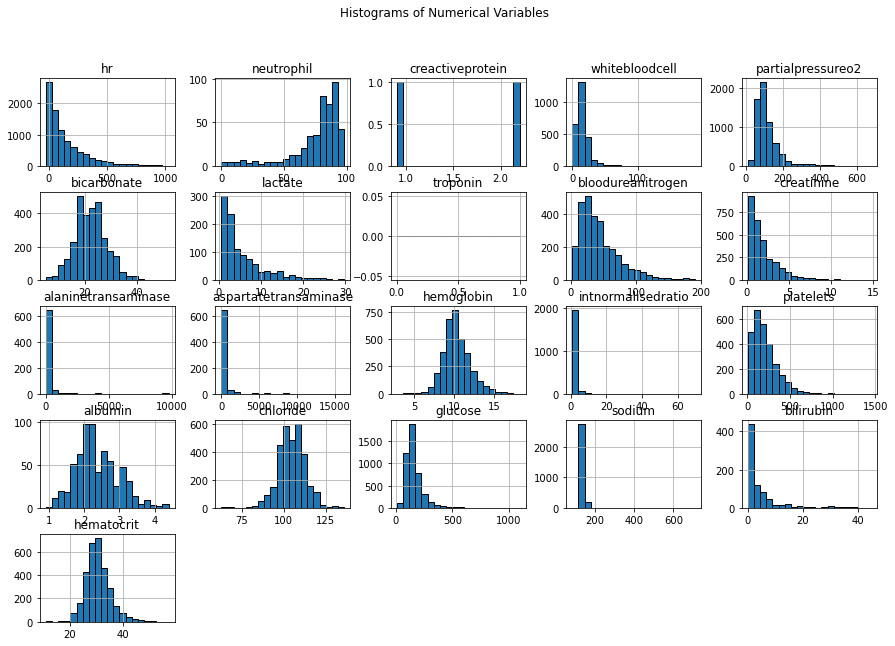

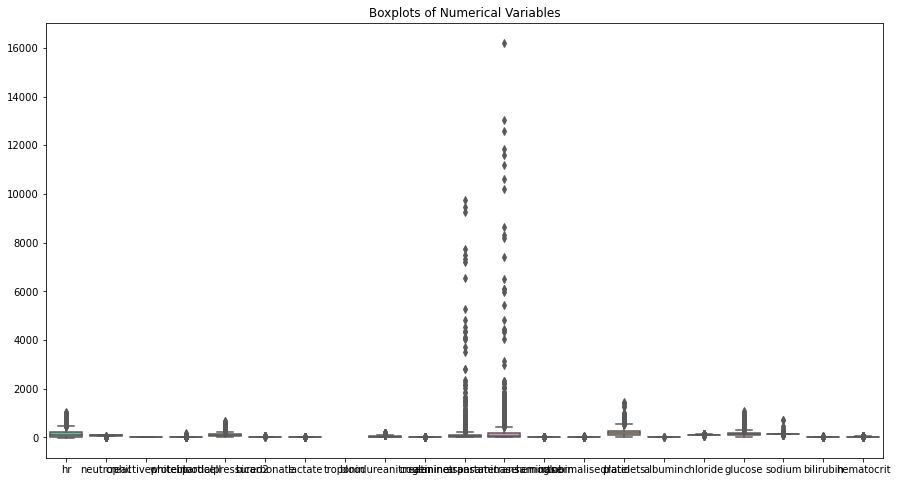

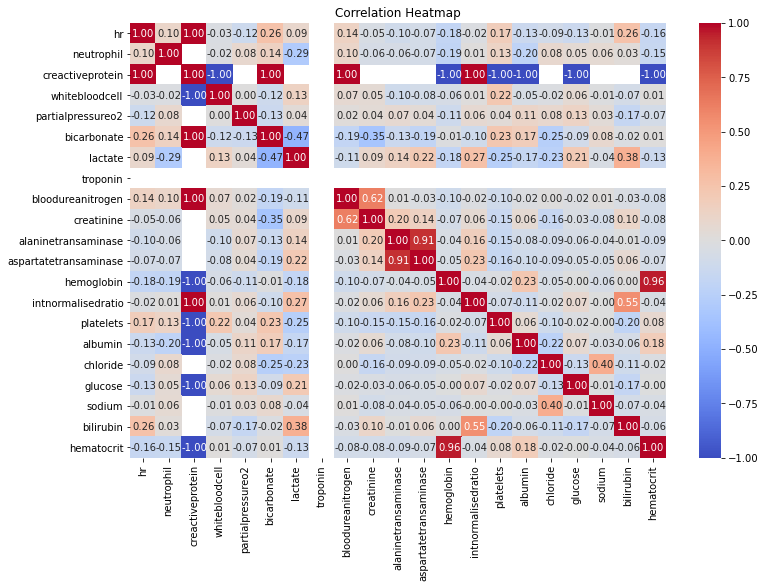

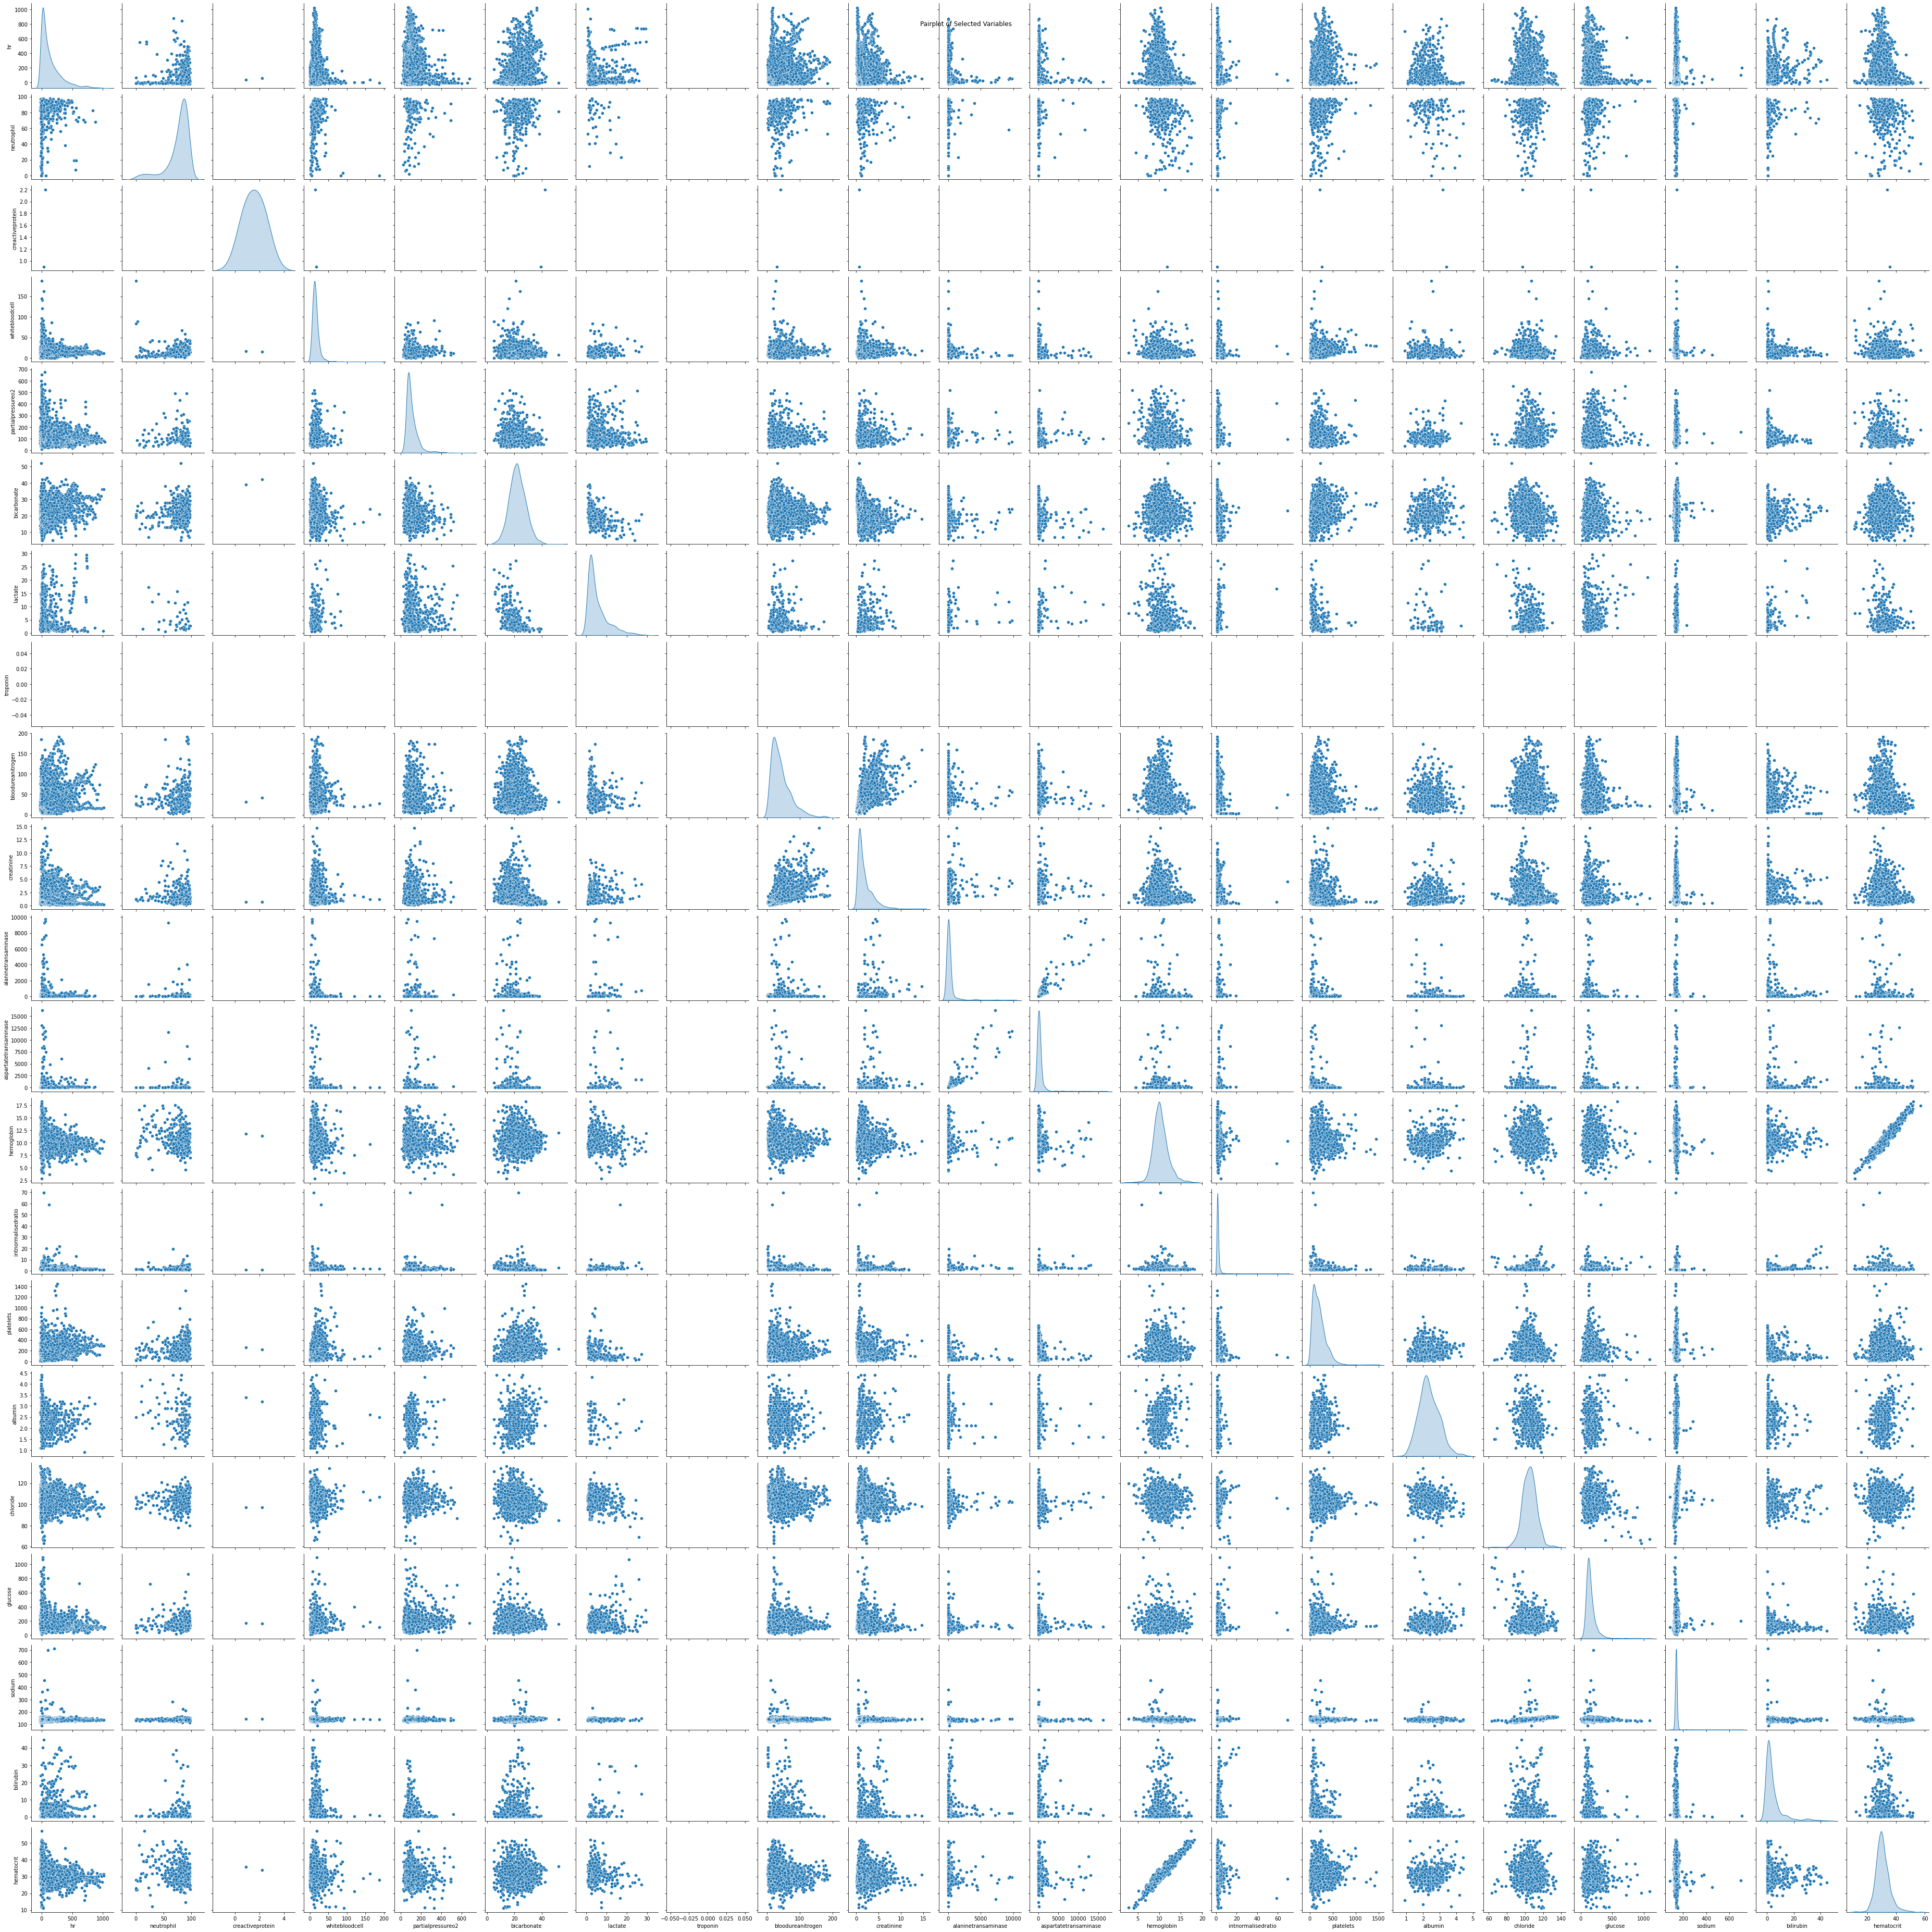

In [36]:
# Display basic statistics of numerical columns
print(df2.describe())

# Visualize distribution of numerical variables
numerical_columns = ['hr', 'neutrophil', 'creactiveprotein', 'whitebloodcell', 'partialpressureo2',
    'bicarbonate', 'lactate', 'troponin', 'bloodureanitrogen', 'creatinine',
    'alaninetransaminase', 'aspartatetransaminase', 'hemoglobin', 'intnormalisedratio',
    'platelets', 'albumin', 'chloride', 'glucose', 'sodium', 'bilirubin', 'hematocrit']

plt.figure(figsize=(12, 8))
df2[numerical_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Boxplot for each numerical variable
plt.figure(figsize=(15, 8))
sns.boxplot(data=df2[numerical_columns], palette='Set2')
plt.title('Boxplots of Numerical Variables')
plt.show()

# Correlation heatmap
correlation_matrix = df2[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected variables
selected_variables = ['hr', 'neutrophil', 'creactiveprotein', 'whitebloodcell', 'partialpressureo2',
    'bicarbonate', 'lactate', 'troponin', 'bloodureanitrogen', 'creatinine',
    'alaninetransaminase', 'aspartatetransaminase', 'hemoglobin', 'intnormalisedratio',
    'platelets', 'albumin', 'chloride', 'glucose', 'sodium', 'bilirubin', 'hematocrit']
sns.pairplot(df2[selected_variables], diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables')
plt.show()

In [27]:
df.icu_expire_flag

6300       1
6301       1
6302       1
6303       1
6304       1
          ..
6609899    1
6609900    1
6609901    1
6609902    1
6609903    1
Name: icu_expire_flag, Length: 45394, dtype: int64

In [18]:
vitals_hourly_df = vitals_hourly_df.drop(['fio2', 'insurance', 'ethnicity', 'religion', 'marital_status'], axis=1)

vitals_hourly_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292362 entries, 0 to 7292361
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   icustay_id            int64  
 1   hr                    int64  
 2   spo2                  float64
 3   fio2                  float64
 4   temperature           float64
 5   resprate              float64
 6   heartrate             float64
 7   sysbp                 float64
 8   diasbp                float64
 9   glucose               float64
 10  meanarterialpressure  float64
dtypes: float64(9), int64(2)
memory usage: 612.0 MB


In [33]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 928209 entries, 0 to 928208
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 928209 non-null  int64  
 1   subject_id             928209 non-null  int64  
 2   dob                    928209 non-null  object 
 3   hadm_id                928209 non-null  int64  
 4   admittime              639734 non-null  object 
 5   dischtime              639734 non-null  object 
 6   icustay_id             928209 non-null  int64  
 7   intime                 928209 non-null  object 
 8   outtime                928209 non-null  object 
 9   los                    928209 non-null  float64
 10  hosp_deathtime         42860 non-null   object 
 11  icu_expire_flag        928209 non-null  int64  
 12  hospital_expire_flag   639734 non-null  float64
 13  dod                    472217 non-null  object 
 14  expire_flag            928209 non-nu

In [19]:
pt_icu_outcome_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61533 entries, 0 to 61532
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row_id                61533 non-null  int64  
 1   subject_id            61533 non-null  int64  
 2   dob                   61533 non-null  object 
 3   hadm_id               61533 non-null  int64  
 4   admittime             49185 non-null  object 
 5   dischtime             49185 non-null  object 
 6   icustay_id            61533 non-null  int64  
 7   age_years             61533 non-null  float64
 8   intime                61533 non-null  object 
 9   outtime               61523 non-null  object 
 10  los                   61523 non-null  float64
 11  hosp_deathtime        2277 non-null   object 
 12  icu_expire_flag       61533 non-null  int64  
 13  hospital_expire_flag  49185 non-null  float64
 14  dod                   24192 non-null  object 
 15  expire_flag        

## Merge tables on subject_id

In [40]:
df = pd.merge(pt_icu_outcome_df, vitals_hourly_df, on="icustay_id", how="inner")
df = df[df.filter(regex='^(?!.*_y)').columns]
df.columns = df.columns.str.replace('_x', '')

In [32]:
df2 = pd.merge(pt_icu_outcome_df, labs_hourly_df, on="icustay_id", how="inner")
df2 = df2[df2.filter(regex='^(?!.*_y)').columns]
df2.columns = df2.columns.str.replace('_x', '')

In [6]:
df = pd.merge(df, patients_df, on="subject_id", how="inner")
df = df[df.filter(regex='^(?!.*_y)').columns]
df.columns = df.columns.str.replace('_x', '')

In [10]:
df = pd.merge(df, vitals_hourly_df, on="icustay_id", how="inner")
df = df[df.filter(regex='^(?!.*_y)').columns]
df.columns = df.columns.str.replace('_x', '')

In [4]:
df = pd.merge(df, labs_hourly_df, on="icustay_id", how="inner")
df = df[df.filter(regex='^(?!.*_y)').columns]
df.columns = df.columns.str.replace('_x', '')

In [ ]:
df = pd.merge(df, gcs_hourly_df, on="icustay_id", how="inner")
df = df[df.filter(regex='^(?!.*_y)').columns]
df.columns = df.columns.str.replace('_x', '')

In [11]:
df.head()

row_id  subject_id                  dob  hadm_id            admittime  \
0       1           2  2138-07-17 00:00:00   163353  2138-07-17 19:04:00   
1       1           2  2138-07-17 00:00:00   163353  2138-07-17 19:04:00   
2       1           2  2138-07-17 00:00:00   163353  2138-07-17 19:04:00   
3       2           3  2025-04-11 00:00:00   145834  2101-10-20 19:08:00   
4       2           3  2025-04-11 00:00:00   145834  2101-10-20 19:08:00   

             dischtime  icustay_id               intime              outtime  \
0  2138-07-21 15:48:00      243653  2138-07-17 21:20:07  2138-07-17 23:32:21   
1  2138-07-21 15:48:00      243653  2138-07-17 21:20:07  2138-07-17 23:32:21   
2  2138-07-21 15:48:00      243653  2138-07-17 21:20:07  2138-07-17 23:32:21   
3  2101-10-31 13:58:00      211552  2101-10-20 19:10:11  2101-10-26 20:43:09   
4  2101-10-31 13:58:00      211552  2101-10-20 19:10:11  2101-10-26 20:43:09   

      los  ... hr   spo2  fio2 temperature  resprate  heartrate      sysbp  \
0  0.0918  ...  1    NaN   NaN         NaN       NaN        NaN        NaN   
1  0.0918  ...  2    NaN   NaN         NaN       NaN        NaN        NaN   
2  0.0918  ...  3    NaN   NaN         NaN       NaN        NaN        NaN   
3  6.0646  ...  1   96.0   NaN         NaN      15.5     153.75  81.000000   
4  6.0646  ...  2  100.0   NaN         NaN       7.0     137.75  90.666667   

      diasbp glucose meanarterialpressure  
0        NaN     NaN                  NaN  
1        NaN     NaN                  NaN  
2        NaN     NaN                  NaN  
3  44.125000     NaN            57.333337  
4  47.333333   267.0            63.222217  

[5 rows x 42 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7292533 entries, 0 to 7292532
Data columns (total 42 columns):
 #   Column                Dtype  
---  ------                -----  
 0   row_id                int64  
 1   subject_id            int64  
 2   dob                   object 
 3   hadm_id               int64  
 4   admittime             object 
 5   dischtime             object 
 6   icustay_id            int64  
 7   intime                object 
 8   outtime               object 
 9   los                   float64
 10  hosp_deathtime        object 
 11  icu_expire_flag       int64  
 12  hospital_expire_flag  float64
 13  dod                   object 
 14  expire_flag           int64  
 15  ttd_days              float64
 16  deathtime             object 
 17  admission_type        object 
 18  admission_location    object 
 19  discharge_location    object 
 20  insurance             object 
 21  language              object 
 22  religion              object 
 23  marital

In [51]:
icustays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          61532 non-null  int64  
 1   subject_id      61532 non-null  int64  
 2   hadm_id         61532 non-null  int64  
 3   icustay_id      61532 non-null  int64  
 4   dbsource        61532 non-null  object 
 5   first_careunit  61532 non-null  object 
 6   last_careunit   61532 non-null  object 
 7   first_wardid    61532 non-null  int64  
 8   last_wardid     61532 non-null  int64  
 9   intime          61532 non-null  object 
 10  outtime         61522 non-null  object 
 11  los             61522 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


In [21]:
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                58976 non-null  int64 
 1   subject_id            58976 non-null  int64 
 2   hadm_id               58976 non-null  int64 
 3   admittime             58976 non-null  object
 4   dischtime             58976 non-null  object
 5   deathtime             5854 non-null   object
 6   admission_type        58976 non-null  object
 7   admission_location    58976 non-null  object
 8   discharge_location    58976 non-null  object
 9   insurance             58976 non-null  object
 10  language              33644 non-null  object
 11  religion              58518 non-null  object
 12  marital_status        48848 non-null  object
 13  ethnicity             58976 non-null  object
 14  edregtime             30877 non-null  object
 15  edouttime             30877 non-null

In [19]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       46520 non-null  int64 
 1   subject_id   46520 non-null  int64 
 2   gender       46520 non-null  object
 3   dob          46520 non-null  object
 4   dod          15759 non-null  object
 5   dod_hosp     9974 non-null   object
 6   dod_ssn      13378 non-null  object
 7   expire_flag  46520 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [3]:
# Display the first few rows of the dataset
print(admissions_df.head())

# Get information about the dataset (data types, non-null counts)
print(admissions.info())

# Descriptive statistics of numerical columns
print(admissions.describe())

   row_id  subject_id  hadm_id            admittime            dischtime  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  deathtime admission_type         admission_location  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          discharge_location insurance language           religion  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1           HOME HEALTH CARE  Medicare      NaN           CA

In [4]:
# Check for missing values
print(admissions.isnull().sum())

# Handle missing values (if needed)
# For example, drop rows with missing values:
# df = df.dropna()


row_id                      0
subject_id                  0
hadm_id                     0
admittime                   0
dischtime                   0
deathtime               53122
admission_type              0
admission_location          0
discharge_location          0
insurance                   0
language                25332
religion                  458
marital_status          10128
ethnicity                   0
edregtime               28099
edouttime               28099
diagnosis                  25
hospital_expire_flag        0
has_chartevents_data        0
dtype: int64


In [5]:
# Check for duplicate rows
print(admissions.duplicated().sum())

# Remove duplicates
# df = df.drop_duplicates()


0


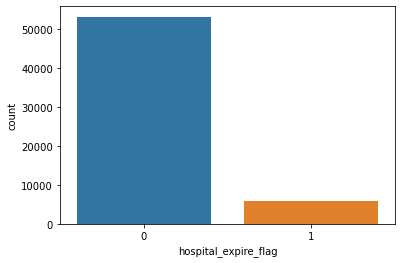

In [7]:

# Countplot for categorical variables
sns.countplot(x='hospital_expire_flag', data=admissions)
plt.show()


In [ ]:
antibiotics = pd.read_csv("/Users/zacharylukac/Desktop/HDAT-9910-Capstone/mimic_data/antibiotics.csv")

In [ ]:
antibiotics.shape[0]

In [ ]:
bloodculture = pd.read_csv("/Users/zacharylukac/Desktop/HDAT-9910-Capstone/mimic_data/bloodculture.csv")

In [ ]:
bloodculture

In [ ]:
gcs_hourly = pd.read_csv("/Users/zacharylukac/Desktop/HDAT-9910-Capstone/mimic_data/gcs_hourly.csv")

In [ ]:
gcs_hourly